In [1]:
from tensorflow.keras.datasets import fashion_mnist

In [3]:
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 16us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 38s 1us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 4s 1us/step


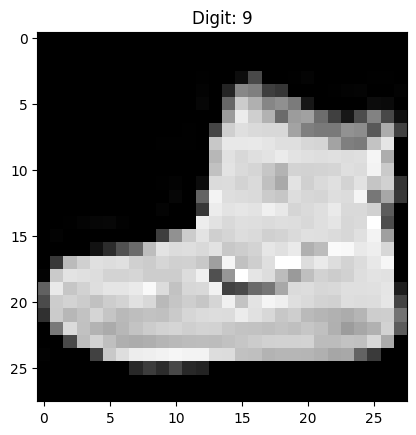

In [4]:
import matplotlib.pyplot as plt
image=train_images[0]
label=train_labels[0]
plt.imshow(image,cmap='gray')
plt.title(f"Digit: {label}")
plt.show()

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
train_labels.shape

(60000,)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
test_labels.shape

(10000,)

In [9]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [10]:
from tensorflow import keras
from tensorflow.keras import layers

In [11]:
model=keras.Sequential(
    [layers.Dense(512,activation="relu"),
     layers.Dense(10,activation="softmax")]

)

In [12]:
#relu(x,)=max(0,x)
def relu(x):
  return max(0,x)
print(relu(-3))
print(relu(10))

0
10


In [13]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [14]:
train_images=train_images.reshape((60000,28*28))
train_images.shape

(60000, 784)

In [15]:
train_images

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [16]:
train_images=train_images.astype("float32")/255

In [17]:
test_images=test_images.reshape((10000,28*28))
test_images=test_images.astype("float32")/255

In [18]:
test_images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [19]:
model.fit(train_images,train_labels,epochs=5,batch_size=128,verbose=1)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.7730 - loss: 0.6667
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8626 - loss: 0.3848
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8801 - loss: 0.3337
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.8876 - loss: 0.3070
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.8956 - loss: 0.2845


In [20]:
test_digit=test_images[0:10]
test_digit.shape

(10, 784)

In [21]:
predictions=model.predict(test_digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


In [22]:
predictions[0]

array([8.1559574e-06, 5.4744390e-08, 4.1459225e-06, 1.1277735e-06,
       4.6412911e-06, 5.9128660e-03, 2.9677662e-05, 1.8798701e-02,
       2.5633466e-05, 9.7521508e-01], dtype=float32)

In [23]:
predictions[0].argmax()

9

In [24]:
test_labels[0]

9

In [25]:
predictions[1]

array([5.6655340e-06, 1.1285492e-08, 9.9719393e-01, 5.1702383e-08,
       2.4257372e-03, 1.2331938e-12, 3.7450428e-04, 1.4657279e-12,
       2.3056810e-08, 1.7465903e-13], dtype=float32)

In [26]:
predictions[1].argmax()

2

In [27]:
test_labels[1]

2

In [28]:
test_loss,test_acc=model.evaluate(test_images,test_labels)
print(f"Test accuracy: {test_acc*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8796 - loss: 0.3257
Test accuracy: 88.00%
